# Multi-Armed Bandits (ε-Greedy & UCB)

Part of IIT Kanpur eMasters course (EE-958 Reinforcement Learning Module).  
Original submission adapted for public portfolio (personal identifiers and submission instructions removed).


In [12]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]


***
## Example

Consider a two-armed Bernoulli bandit scenario with true means given by $\mu(0) = \frac{1}{2}, \mu(1)= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. In the Bernoulli bandit scenario the environment generates a binary reward (either 1 or 0) by flipping a coin with the true mean of the chosen arm as the bias.  

Let the time horizon be $T=10000$. 

### Experiment 1: ε-Greedy
We take $\Delta=\frac{1}{4}$ and run the Monte Carlo simulations to estimate the expected regret of the ETC algorithm which explores each arm $m = T^{2/3} (\log T)^{1/3}$ times before committing. Specifically, we run the ETC algorithm to compute the sample regret
$$ \mu(1) * T - \sum_{t=1}^T R_t, $$
where $R_t$ is the reward obtained in time step $t$.

Let us repeat this experiment 500 times and estimate the expected regret by taking the average of the sample regrets you obtained in all those 500 experiments.

In [ ]:
## Experiment 1: ETC Demo Code ##

# Monte Carlo simulation for Explore-Then-Commit (ETC)
total_regrets = []

for _ in range(num_experiments):
    # True means for the two-armed Bernoulli bandit
    mu0 = 1/2
    mu1 = 1/2 + delta
    mu = np.array([mu0, mu1])
    mu_star = mu.max()


    # ETC parameters
    m = int(T**(2/3) * (np.log(T))**(1/3))   # exploration length
    empirical_means = np.zeros(K)            # estimated means
    arm_counts = np.zeros(K)                 # pull counts
    total_regret = 0

    # Run ETC for T steps
    for t in range(1, T + 1):
        # Select arm: explore each arm m times, then commit to best
        if t <= K * m:
            chosen_arm = (t - 1) % K
        else:
            chosen_arm = np.argmax(empirical_means)

        # Simulate reward from chosen arm
        reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

        # Update counts and means
        arm_counts[chosen_arm] += 1
        empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

        # Update regret (optimal mean – reward received)
        total_regret += mu_star - mu[chosen_arm]

    # Record total regret for this run
    total_regrets.append(total_regret)

# Average regret across experiments
average_regret = np.mean(total_regrets)
print(f"Average Regret: {average_regret}")


Average Regret: 243.0


**Few Points Regarding ETC(Explore-Then-Commit) algorithm-**  <br />
The ETC (Explore-Then-Commit) algorithm is a bandit algorithm that explores each arm a certain number of times before committing to the arm with the highest estimated mean. In this case, the exploration parameter is set as $𝑚 = 𝑇^{2/3} (\log 𝑇)^{1/3}$.<br />


### Experiment 2: Varying Δ

Now we repeat the above for various values of $\Delta \in \{0.05, 0.1, 0.2, 0.3, 0.4, 0.45\}$ and plot the estimated regret as a function of $\Delta$.

In [ ]:
## Experiment 2: ETC regret plot for different delta ##

# Store average regrets for each delta
average_regrets_etc = []

for delta in delta_values:
    total_regrets = []

    for _ in range(num_experiments):
        # True means for 2-armed Bernoulli bandit
        mu0 = 0.5
        mu1 = 0.5 + delta
        mu = np.array([mu0, mu1])
        mu_star = mu.max()

        # ETC parameters
        m = int(T**(2/3) * (np.log(T))**(1/3))   # exploration length
        empirical_means = np.zeros(K)            # estimated means
        arm_counts = np.zeros(K)                 # pull counts
        total_regret = 0

        # Run ETC for T steps
        for t in range(1, T + 1):
            # Arm selection: explore each arm m times, then commit
            if t <= K * m:
                chosen_arm = (t - 1) % K
            else:
                chosen_arm = np.argmax(empirical_means)

            # Simulate reward
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update counts and means
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Regret = optimal mean – received reward
            total_regret += mu_star - mu[chosen_arm]

        # Record regret for this run
        total_regrets.append(total_regret)

    # Average regret for this delta
    average_regret = np.mean(total_regrets)
    average_regrets_etc.append(average_regret)

# Print regrets across all deltas
print(average_regrets_etc)


[np.float64(50.3175999999996), np.float64(97.19999999999875), np.float64(194.3999999999975), np.float64(291.60000000000537), np.float64(388.799999999995), np.float64(437.39999999999264)]


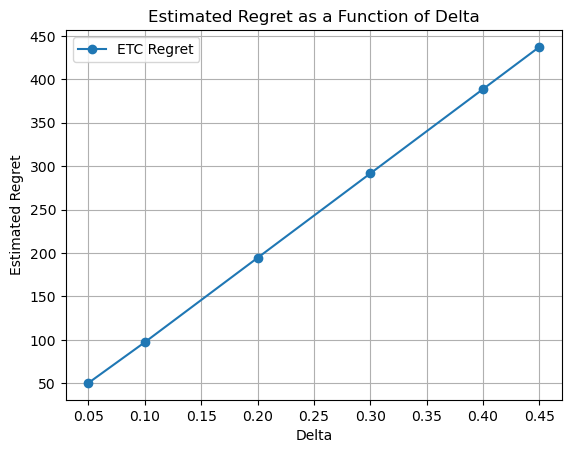

In [17]:
# Plotting
plt.plot(delta_values, average_regrets_etc, marker='o',label = 'ETC Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

***
# Questions

### Experiment 3: UCB
Repeat the experiment for various values of delta using the UCB algorithm and plot the comparison with ETC.

**The Upper Confidence Bound (UCB) algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and an exploration term. The exploration term is designed to account for uncertainty in the estimates of arm means. Here's how UCB works:

Assuming we have two arms with true means $\mu(0) = \frac{1}{2}$ and $\mu(1) = \frac{1}{2} + \Delta$, and a time horizon $T = 10000$, the UCB algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $a$, set the empirical mean $\bar{\mu}_0(a)$ to $0$ and the count $n_0(a)$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- For each arm $a$, calculate the Upper Confidence Bound (UCB) for that arm:
  $$ UCB_t(a) = \bar{\mu}_{t-1}(a) + \sqrt{\frac{2\log(t)}{n_{t-1}(a)}} $$
  where:
  - $\mu_t(a)$ is the empirical mean of arm $a$ at time $t$.
  - $n_t(a)$ is the count of arm $a$ at time $t$.
- Choose the arm with the highest UCB: $ \text{chosen\_arm} = \underset{a}{\text{arg max}} ~ UCB_t(a) $

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ n_{t}(\text{chosen\_arm}) = n_{t-1}(\text{chosen\_arm}) + 1 $$
$$ \bar{\mu}_{t}(\text{chosen\_arm}) = \frac{\bar{\mu}_{t-1}(\text{chosen\_arm}) (\cdot n_{t}(\text{chosen\_arm}) -1) + R_t}{n_{t}(\text{chosen\_arm})} $$


**Repeat until $t = T$.**

In [ ]:
## Experiment 3: UCB regret plot for different delta ##

# Average regret for each Δ
average_regrets_ucb = []

# UCB exploration constant (you can keep √(3/2) or tune)
c_ucb = np.sqrt(3/2)


for delta in delta_values:
    total_regrets_ucb = []

    for _ in range(num_experiments):
        # True means
        mu0 = 0.5
        mu1 = 0.5 + delta
        mu = np.array([mu0, mu1])
        mu_star = mu.max()

        # Init
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K, dtype=int)
        total_regret_ucb = 0.0

        # Pull each arm once (makes n(a) ≥ 1 and charges initial regret)
        for arm in range(K):
            reward = np.random.binomial(1, mu[arm])
            empirical_means[arm] = reward
            arm_counts[arm] = 1
            total_regret_ucb += (mu_star - mu[arm])

        # Main UCB loop: t = K+1..T
        for t in range(K + 1, T + 1):
            ucb_values = np.empty(K)
            for arm in range(K):
                ucb_values[arm] = empirical_means[arm] + c_ucb * np.sqrt((2 * np.log(t)) / arm_counts[arm])

            chosen_arm = int(np.argmax(ucb_values))

            # Observe reward
            reward = np.random.binomial(1, mu[chosen_arm])

            # Update estimates
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (
                (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward)
                / arm_counts[chosen_arm]
            )

            # Regret increment (μ* − μ_chosen)
            total_regret_ucb += (mu_star - mu[chosen_arm])

        total_regrets_ucb.append(total_regret_ucb)

    # Average over experiments
    average_regrets_ucb.append(np.mean(total_regrets_ucb))

# Inspect or plot
print(average_regrets_ucb)


[np.float64(114.0854999999967), np.float64(113.21199999999784), np.float64(86.39080000000068), np.float64(66.28499999999974), np.float64(54.68159999999989), np.float64(48.98250000000007)]


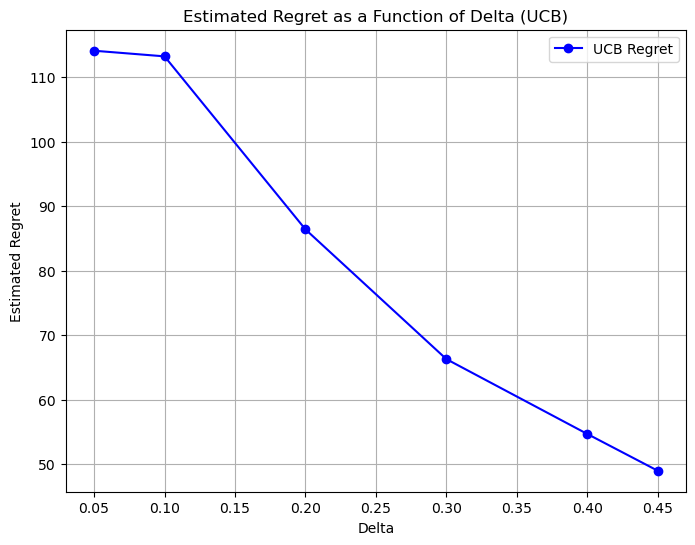

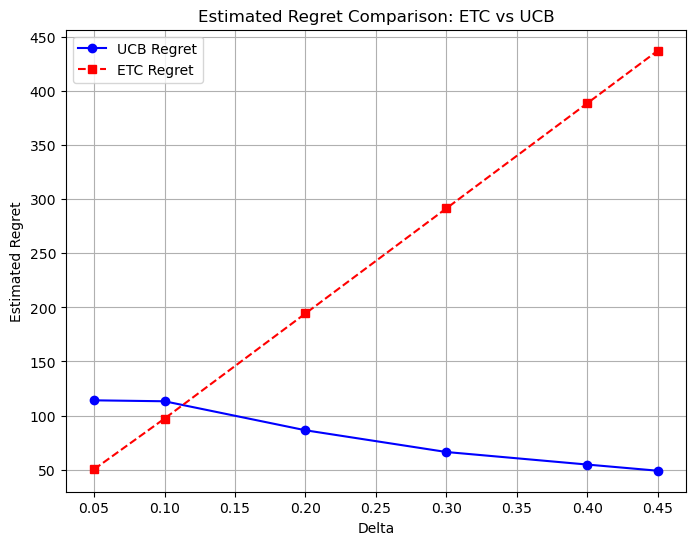

In [22]:
# Comparison of ETC and UCB algorithm.


# Plotting# Plotting UCB Regret alone
plt.figure(figsize=(8, 6))
plt.plot(delta_values, average_regrets_ucb, marker='o', linestyle='-', color='b', label='UCB Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta (UCB)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Comparison of ETC vs UCB
plt.figure(figsize=(8, 6))
plt.plot(delta_values, average_regrets_ucb, marker='o', linestyle='-', color='b', label="UCB Regret")
plt.plot(delta_values, average_regrets_etc, marker='s', linestyle='--', color='r', label="ETC Regret")

plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret Comparison: ETC vs UCB')
plt.legend()
plt.grid(True)
plt.show()

### Experiment 4: The $\epsilon$-greedy algorithm
Repeat the above experiment for various values of $\Delta$ using the $\epsilon$-greedy algorithm and plot the comparison with ETC and UCB.

**The $\epsilon$-greedy algorithm** is a popular algorithm used in multi-armed bandit problems. Its key idea is to balance exploration and exploitation by choosing arms based on both their empirical means and mixing it up sometimes with exploration. The exploration probabiliy $\epsilon$ designed to account for the fact that true means are not known and some exploration will help us find a better estimate of that. Here's how $\epsilon$-greedy works:

Assuming we have two arms with true means $\mu(0) = \frac{1}{2}$ and $\mu(1) = \frac{1}{2} + \Delta$, and a time horizon $T = 10000$, the $\epsilon$-greedy algorithm proceeds as follows:

**Initialization:**
- Initialize empirical means and counts for each arm.
- For each arm $a$, set the empirical mean $\bar{\mu}_0(a)$ to $0$ and the count $n_0(a)$ to $0$.

**For each time step $t$ from $1$ to $T$:**
- Toss a coin with probability of heads as $1-\epsilon$
- If we get Heads:
    - Choose the arm with the highest empirical mean: $ \text{chosen\_arm} = \underset{a}{\text{arg max}} \bar{\mu}_t(a) $
- else:
    - Choose an arm at random

- Observe the reward $R_t$ for the chosen arm.
- Update the empirical mean and count for the chosen arm:
$$ n_{t}(\text{chosen\_arm}) = n_{t-1}(\text{chosen\_arm}) + 1 $$
$$ \bar{\mu}_{t}(\text{chosen\_arm}) = \frac{\bar{\mu}_{t-1}(\text{chosen\_arm}) (\cdot n_{t}(\text{chosen\_arm}) -1) + R_t}{n_{t}(\text{chosen\_arm})} $$


The constant $\epsilon$ in the $\epsilon$-greedy algorithm controls the trade-off between exploration and exploitation. A common choice is $\epsilon = 0.1$.

In [ ]:
## Experiment 4: The ε-greedy regret plot for different delta ##

# Store average regrets for each delta
average_regrets_egreedy = []

for delta in delta_values:
    total_regrets_egreedy = []

    for i in range(num_experiments):
        # True means for 2-armed Bernoulli bandit
        mu0 = 0.5
        mu1 = 0.5 + delta

        # ε parameter for exploration
        e = 0.1

        # Initialize estimates and counts
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret_egreedy = 0

        # Run ε-greedy for T steps
        for t in range(1, T + 1):
            # With prob (1-ε) choose best arm, else pick random arm
            coin_toss = np.random.choice(["Head", "Tail"], p=[1-e, e])
            if coin_toss == "Head":
                chosen_arm = np.argmax(empirical_means)
            else:
                chosen_arm = np.random.choice(range(K))
            
            # Simulate reward
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update counts and mean estimate
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = ((empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1)) + reward) / arm_counts[chosen_arm]
            
            # Regret = optimal mean – received reward
            total_regret_egreedy += mu1 - reward

        # Record regret for this run
        total_regrets_egreedy.append(total_regret_egreedy)

    # Average regret for this delta
    average_regret_egreedy = np.mean(total_regrets_egreedy)
    average_regrets_egreedy.append(average_regret_egreedy)

# Print results
print(average_regrets_egreedy)


[np.float64(57.23200000000015), np.float64(75.201999999991), np.float64(112.38800000000526), np.float64(157.08000000000723), np.float64(209.96200000003614), np.float64(236.06799999995843)]


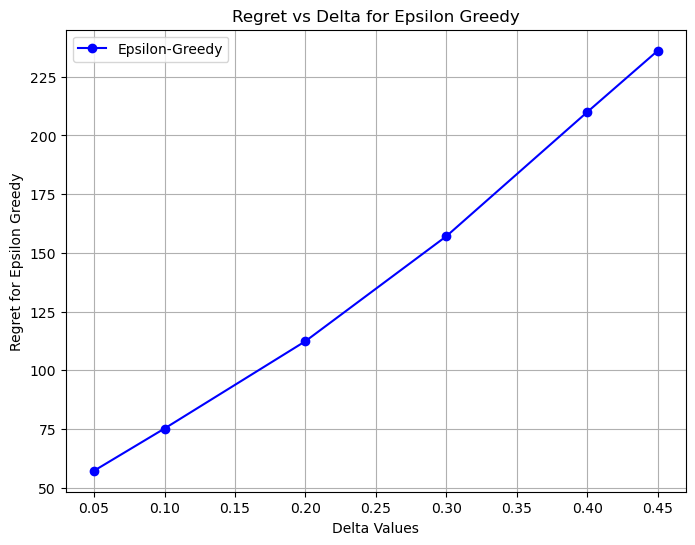

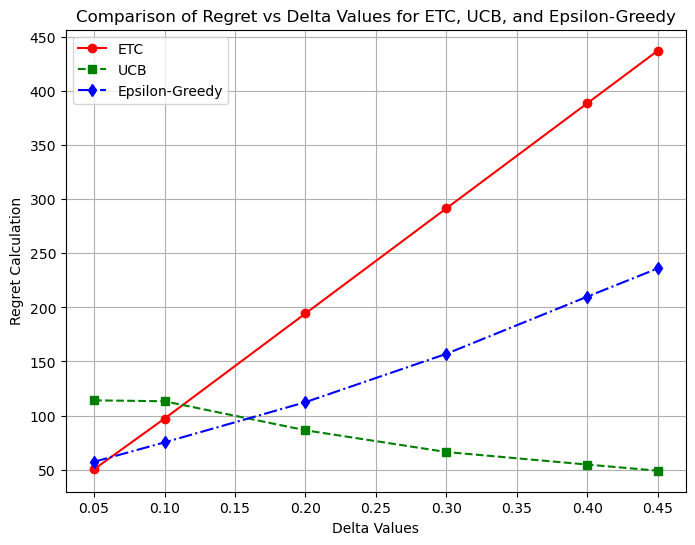

In [ ]:
# Final plot containing all the Algorithm's estimated regret vs delta 

#Plotting Epsilon Greedy

plt.figure(figsize=(8,6))
plt.xlabel("Delta Values")
plt.ylabel("Regret for Epsilon Greedy")
plt.title("Regret vs Delta for Epsilon Greedy")
plt.plot(delta_values, average_regrets_egreedy, marker='o', linestyle='-', color='b', label='Epsilon-Greedy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Comparison of Regret vs Delta Values for ETC, UCB, and Epsilon-Greedy
plt.figure(figsize=(8,6))
plt.xlabel("Delta Values")
plt.ylabel("Regret Calculation")
plt.title("Comparison of Regret vs Delta Values for ETC, UCB, and Epsilon-Greedy")

# Corrected plot labels and styles
plt.plot(delta_values, average_regrets_etc, marker='o', linestyle='-', color='r', label="ETC")
plt.plot(delta_values, average_regrets_ucb, marker='s', linestyle='--', color='g', label="UCB")
plt.plot(delta_values, average_regrets_egreedy, marker='d', linestyle='-.', color='b', label="Epsilon-Greedy")

plt.legend()
plt.grid(True)
plt.show()
